## sigmoid function

In [1]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0 / (1 + math.exp(-x))
    ### END CODE HERE ###

    return s

In [2]:
basic_sigmoid(3)

0.9525741268224334

## 向量（矩阵）的引入，numpy库的使用

In [3]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[  2.71828183   7.3890561   20.08553692]


In [4]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


## sigmoid function 
- numpy库实现

In [5]:
# GRADED FUNCTION: sigmoid

import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0 / (1 + np.exp(-x))
    ### END CODE HERE ###

    return s

In [6]:
x = np.array([1, 2, 3])
sigmoid(x)

array([ 0.73105858,  0.88079708,  0.95257413])

## Sigmoid gradient

Exercise: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is:

>sigmoid_derivative(x)=σ′(x)=σ(x)(1−σ(x))

You often code this function in two steps: 
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful. 
2. Compute σ′(x)=s(1−s)

>上面第二步就是σ(x)对x求导的结果（需要化简）。不过需要事先手动求出导函数表达式

In [7]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    s = 1.0 / (1 + np.exp(-x))
    ds = s * (1 - s)
    ### END CODE HERE ###

    return ds

In [8]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [ 0.19661193  0.10499359  0.04517666]


### 1.3 - Reshaping arrays

Two common numpy functions used in deep learning are np.shape and np.reshape(). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(…) is used to reshape X into some other dimension.

For example, in computer science, an image is represented by a 3D array of shape (length,height,depth=3). However, when you read an image as the input of an algorithm you convert it to a vector of shape (length∗height∗3,1). In other words, you “unroll”, or reshape, the 3D array into a 1D vector.


Exercise: Implement image2vector() that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
>v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c

In [9]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    ### END CODE HERE ###

    return v

In [10]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]


In [11]:
image2vector(image).shape

(18, 1)

## 1.4 - Normalizing rows

In [12]:
# GRADED FUNCTION: normalizeRows

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).

    Argument:
    x -- A numpy matrix of shape (n, m)

    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    x_norm = np.linalg.norm(x, axis=1, keepdims=True) # keepdims参数表示保留原矩阵维度特性
    x = x / x_norm        # numpy广播特性
    ### END CODE HERE ###

    return x

In [13]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[ 0.          0.6         0.8       ]
 [ 0.13736056  0.82416338  0.54944226]]


### 1.5 - Broadcasting and the softmax function

A very important concept to understand in numpy is “broadcasting”. It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [14]:
# GRADED FUNCTION: softmax

def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """

    ### START CODE HERE ### (≈ 3 lines of code)
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp / x_sum
    ### END CODE HERE ###

    return s

In [15]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[  9.80897665e-01   8.94462891e-04   1.79657674e-02   1.21052389e-04
    1.21052389e-04]
 [  8.78679856e-01   1.18916387e-01   8.01252314e-04   8.01252314e-04
    8.01252314e-04]]


## Vectorization

In [16]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms
outer = [[ 81.  18.  18.  81.   0.  81.  18.  45.   0.   0.  81.  18.  45.   0.
    0.]
 [ 18.   4.   4.  18.   0.  18.   4.  10.   0.   0.  18.   4.  10.   0.
    0.]
 [ 45.  10.  10.  45.   0.  45.  10.  25.   0.   0.  45.  10.  25.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [ 63.  14.  14.  63.   0.  63.  14.  35.   0.   0.  63.  14.  35.   0.
    0.]
 [ 45.  10.  10.  45.   0.  45.  10.  25.   0.   0.  45.  10.  25.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [ 81.  18.  18.  81.   0.  81.  18.  45.   0.   0.  81.  18.  45.   0.
    0.]
 [ 18.   4.   4.  18.   0.  18.   4.  10.   0.   0.  18.   4.  10.   0

In [17]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms
outer = [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Computation time = 0.0ms
elementwise multiplication = [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
 ----- Computation time = 0.0ms
gdot = [ 22.54407168  28.93076717  20.52702507]
 ----- Computation time = 15.625ms


### 2.1 Implement the L1 and L2 loss functions

**Exercise**: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

>L1(ŷ ,y)=∑|y(i)−ŷ (i)|

In [18]:
# GRADED FUNCTION: L1

def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    ### START CODE HERE ### (≈ 1 line of code)
    loss = np.abs((yhat - y)).sum()
    ### END CODE HERE ###

    return loss

In [19]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


**Exercise**: Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful

In [20]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    ### START CODE HERE ### (≈ 1 line of code)
    loss = np.dot(yhat - y, yhat - y)
    ### END CODE HERE ###

    return loss

In [21]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43


**What to remember:** 
- Vectorization is very important in deep learning. It provides computational efficiency and clarity. 
- You have reviewed the L1 and L2 loss. 
- You are familiar with many numpy functions such as np.sum, np.dot, np.multiply, np.maximum, etc…

## Part 2： Logistic Regression with a Neural Network mindset

You will learn to: 
- Build the general architecture of a learning algorithm, including: 
- Initializing parameters 
- Calculating the cost function and its gradient 
- Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

### 1 - Packages

First, let’s run the cell below to import all the packages that you will need during this assignment. 
- numpy is the fundamental package for scientific computing with Python. 
- h5py is a common package to interact with a dataset that is stored on an H5 file. 
- matplotlib is a famous library to plot graphs in Python. 
- PIL and scipy are used here to test your model with your own picture at the end.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [23]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


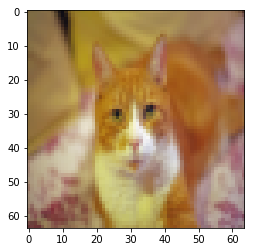

In [24]:
# Example of a picture
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [25]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px ∗ num_px ∗ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px ∗ num_px ∗ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b∗c∗d, a) is to use:

>X_flatten = X.reshape(X.shape[0], -1).T　　　　# X.T is the transpose of X

In [26]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let’s standardize our dataset.

In [27]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

What you need to remember:

Common steps for pre-processing a new dataset are: 
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, …) 
- Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1) 
- “Standardize” the data

## 3 - General Architecture of the learning algorithm

It’s time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why Logistic Regression is actually a very simple Neural Network!

## 4 - Building the parts of our algorithm ##

The main steps for building a Neural Network are: 
1. Define the model structure (such as number of input features) 
2. Initialize the model’s parameters 
3. Loop: 
 - Calculate current loss (forward propagation) 
 - Calculate current gradient (backward propagation) 
 - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call model().

### 4.1 - Helper functions

Exercise: Using your code from “Python Basics”, implement sigmoid(). As you’ve seen in the figure above, you need to compute sigmoid to make predictions. Use np.exp().

In [28]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1.0 / (1 + np.exp(-z))
    ### END CODE HERE ###

    return s

In [29]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


## 4.2 - Initializing parameters

Exercise: Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don’t know what numpy function to use, look up np.zeros() in the Numpy library’s documentation.

In [30]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [31]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


## 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the “forward” and “backward” propagation steps for learning the parameters.

Exercise: Implement a function propagate() that computes the cost function and its gradient.

In [32]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m * (-1.0)
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = np.dot(X, (A - Y).T) / m * 1.0
    db = (A - Y).sum() / m * 1.0
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [33]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


### d) Optimization

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise**: Write down the optimization function. The goal is to learn w and b by minimizing the cost function J. For a parameter θ, the update rule is θ=θ−α dθ, where α is the learning rate.

In [34]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []
    
    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y) 
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w -= learning_rate * dw
        b -= learning_rate * db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [35]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

1. Calculate Ŷ =A=σ(wTX+b)
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [44]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    # Y_prediction = np.zeros((1,m), dtype = int)  # 这里要指定整数类型（默认是float），不然后面索引时会报错（浮点数不能作为索引值）
    Y_prediction = np.zeros((1,m))  # 给定材料中这里没有指定类型，因而后面需要取整
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        '''
        # 也可以用向量直接实现
        Y_prediction = A
        Y_prediction[Y_prediction > 0.5] = 1
        Y_prediction[Y_prediction <= 0.5] = 0
        '''
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [45]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


**What to remember:** 

You’ve implemented several functions that: 
- Initialize (w,b) 
- Optimize the loss iteratively to learn parameters (w,b): 
- computing the cost and its gradient 
- updating the parameters using gradient descent 
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Exercise: Implement the model function. Use the following notation: 
- Y_prediction for your predictions on the test set 
- Y_prediction_train for your predictions on the train set 
- w, costs, grads for the outputs of optimize()

In [46]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###
    
    # 初始化参数
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # 梯度下降
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # 获取参数w和b
    w = params['w']
    b = params['b']
    
    # 预测训练数据和测试数据
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [47]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [50]:
classes

array([b'non-cat', b'cat'], 
      dtype='|S7')

y = 1, you predicted that it is a "cat" picture.


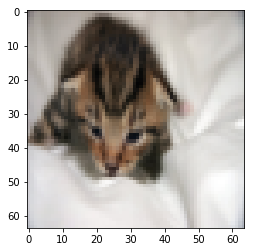

In [53]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

Let’s also plot the cost function and the gradients.

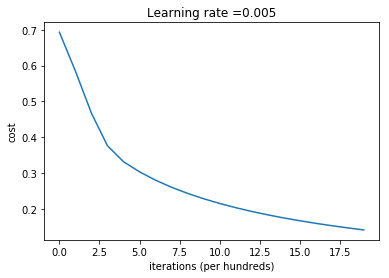

In [54]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs']) # 去掉矩阵中单维度
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation: **

You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

> ** 上面指明增加循环次数可以提高训练数据的准确率，但是同时测试数据的准确率会下降。这就是过拟合的问题！ **

## 6 - Further analysis (optional/ungraded exercise)

Congratulations on building your first image classification model. Let’s analyze it further, and examine possible choices for the learning rate α.

** Choice of learning rate **

Reminder: 

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate α determines how rapidly we update the parameters. If the learning rate is too large we may “overshoot” the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That’s why it is crucial to use a well-tuned learning rate.

Let’s compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the learning_rates variable to contain, and see what happens.

learning rate is: 0.5


D:\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
D:\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
D:\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


train accuracy: 100.0 %
test accuracy: 72.0 %

-------------------------------------------------------

learning rate is: 0.02
train accuracy: 100.0 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



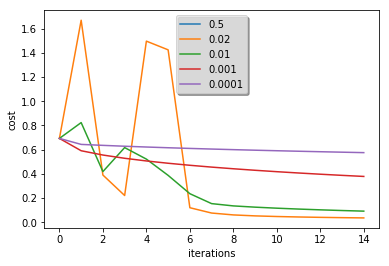

In [55]:
learning_rates = [0.5, 0.02, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

- 当学习速率（learning rate）为0.02时，可以明显看出cost开始震荡，说明速率过大。不过最终也能降到很低的值（从结果看也不会比0.01好多少）
- 特别的是：当速率逐渐增大时（比如0.5或者更大），出现警告错误
```
...\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
...\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
...\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
```
 判断是在下降过程中使得很多cost为无效值，原因暂未明了

**Interpretation: **
- Different learning rates give different costs and thus different predictions results. 
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn’t mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy. 
- In deep learning, we usually recommend that you: 
- Choose the learning rate that better minimizes the cost function. 
- If your model overfits, use other techniques to reduce overfitting. (We’ll talk about this in later videos.)

## 7 - Test with your own image (optional/ungraded exercise)

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that: 
1. Click on “File” in the upper bar of this notebook, then click “Open” to go on your Coursera Hub. 
2. Add your image to this Jupyter Notebook’s directory, in the “images” folder 
3. Change your image’s name in the following code 
4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [56]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
Cost after iteration 1500: 0.087453
Cost after iteration 1600: 0.083286
Cost after iteration 1700: 0.079487
Cost after iteration 1800: 0.076007
Cost after iteration 1900: 0.072809
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


y = 1.0, your algorithm predicts a "cat" picture.


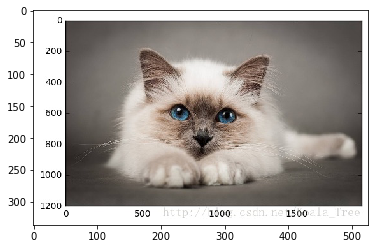

In [61]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "other_test.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten = False))
my_image = scipy.misc.imresize(image, size = (num_px,num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image))].decode("utf-8") +  "\" picture.")

** What to remember from this assignment: **
1. Preprocessing the dataset is important. 
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model(). 
3. Tuning the learning rate (which is an example of a “hyperparameter”) can make a big difference to the algorithm. You will see more examples of this later in this course!

>最后预测自己提供的图片，当学习率（learning rate）小于0.01时，指定的猫咪图片预测错误。上面测试数据的正确率68%

# 下面是一个测试，利用上面的回归模型预测指定文件夹下4张猫咪图片的真伪

In [62]:
def read_pic_to_array(file_name, num_px, num_py):
    """
    加载RGB图片文件，根据指定像素重设图片信息

    Arguments:
    file_name -- 图片路径
    num_px, num_py -- 指定图片像素

    Returns:
    my_image -- 图片数据，类型为narray
    """
    
    image = np.array(ndimage.imread(file_name, flatten = False))
    my_image = scipy.misc.imresize(image, size = (num_px, num_py))
    
    return my_image

In [103]:
def data_handle(test_set_x_orig):
    """
    整理图片数据格式，每张图片对应一个列向量排列成一个矩阵(num_px * num_px * 3, num_pic)

    Arguments:
    test_set_x_orig -- 待预测图片数据 narray(num_pic, num_px, num_px, 3)

    Returns:
    test_set_x -- 图片数据矩阵(num_px * num_px * 3, num_pic)
    """
    
    # 整理数据，每张图片对应一个列向量
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    # 图片数据标准化
    test_set_x = test_set_x_flatten/255.
    
    return test_set_x

In [107]:
def load_pictures(path = 'images', num_px = 64, num_py = 64):
    """
    读取文件夹中所有图片并转换成数据矩阵

    Arguments:
    path -- 图片文件夹路径
    num_px, num_py -- 指定图片像素大小

    Returns:
    test_set_x -- 图片数据矩阵(num_px * num_px * 3, num_pic)
    file_names -- 图片文件名列表
    """
    import os
    
    # 搜寻文件夹下所有图片文件
    file_names = os.listdir(path)
    
    # 读取所有图片文件
    images = []
    for f_name in file_names:
        path_file = path + "/" + f_name
        images.append(read_pic_to_array(path_file, num_px, num_py))
    
    # 将图片数据转换成矩阵(num_pic, num_px, num_px, 3)
    test_set_x_orig = np.array(images)
    
    # 整理数据格式，标准化数据
    test_set_x = data_handle(test_set_x_orig)
    
    return test_set_x, file_names

In [109]:
test_set_x, pic_names = load_pictures()

# 利用逻辑回归预测图片
my_predicted_image = predict(d["w"], d["b"], test_set_x)

In [110]:
my_predicted_image

array([[ 0.,  0.,  1.,  0.]])

In [111]:
pic_names

['71.png', '78.png', 'other_test.jpg', 'tiger.jpg']